### Importacion de series financieras y estimación de volatilidades

In [1]:
import pandas as pd
import numpy as np
import math
from scipy.stats import kurtosis
import matplotlib.pyplot as plt
import yfinance as yf
from arch import arch_model 

Definición de series financieras y sus tickers

In [2]:
series = {
    "ES=F": "S&P Futures",
    "YM=F": "Dow Jones Futures",
    "NQ=F": "Nasdaq Futures",
    "^FTSE": "FTSE 100",
    "^N225": "Nikkei 225",
    "^HSI": "HSI",
    "ZB=F": "U.S. Treasure Bonds Futures",
    "ZN=F": "10-Year T-Note Futures",
    "HG=F": "Copper Futures",
    "SI=F": "Silver Futures",
    #"CL=F": "Crude Oil Futures",
    "GC=F": "Gold Futures",
    "PL=F": "Platinum Futures",
    "NG=F": "Natural Gas Futures",
    "ZC=F": "Corn Futures",
    "ZM=F": "Soybean Meal Futures"
}

series_keys = list(series.keys())
series_name = list(series.values())

In [3]:
data = pd.DataFrame()

for key in series_keys:
    series_data = yf.Ticker(key).history(period="max")
    series_data.reset_index(inplace=True)

    # Renombrando
    series_data[key] = series_data.Close
    
    # Unión
    if data.empty is True:
        data = pd.concat([data, series_data[["Date", key]]])
    else:
        data = pd.merge(data, series_data[["Date", key]], how="left")


In [4]:
data.set_index("Date", inplace=True)
data = data.rename(series, axis = 1)

data.sort_index()
data

,S&P Futures,Dow Jones Futures,Nasdaq Futures,FTSE 100,Nikkei 225,HSI,U.S. Treasure Bonds Futures,10-Year T-Note Futures,Copper Futures,Silver Futures,Gold Futures,Platinum Futures,Natural Gas Futures,Corn Futures,Soybean Meal Futures
Date,,,,,,,,,,,,,,,
2000-09-18,1467.50,NaN,3653.50,6410.200195,16061.160156,15560.160156,NaN,NaN,0.9185,4.876000,271.399994,592.799988,5.295,184.00,166.899994
2000-09-19,1478.50,NaN,3804.00,6403.500000,16124.190430,15677.200195,NaN,NaN,0.9215,4.883000,271.899994,591.700012,5.370,185.00,NaN
2000-09-20,1469.50,NaN,3853.00,6279.899902,16458.310547,15665.620117,NaN,NaN,0.9015,4.830000,269.000000,588.799988,5.320,183.50,167.800003
2000-09-21,1469.50,NaN,3765.00,6199.200195,16311.049805,15164.450195,98.46875,99.953133,0.9255,4.872000,270.299988,585.200012,5.287,183.75,170.800003
2000-09-22,1468.50,NaN,3776.00,6205.899902,15818.250000,14612.879883,98.12500,99.828133,0.9195,4.910000,271.799988,584.500000,5.131,186.25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-07,3936.75,33625.0,11509.50,7489.200195,27686.400391,18814.820312,131.96875,114.859375,3.8555,22.709999,1785.500000,1024.500000,5.723,627.75,462.200012
2022-12-08,3965.75,33803.0,11645.50,7472.200195,27574.429688,19450.230469,131.03125,114.187500,3.8805,23.063000,1788.699951,1027.599976,5.962,632.00,469.299988
2022-12-09,3936.25,33498.0,11569.75,7476.600098,27901.009766,19900.869141,129.93750,113.828125,3.8760,23.535000,1798.099976,1049.199951,6.245,634.75,471.700012


Se eliminan los missings values

In [5]:
data = data.dropna()
data

,S&P Futures,Dow Jones Futures,Nasdaq Futures,FTSE 100,Nikkei 225,HSI,U.S. Treasure Bonds Futures,10-Year T-Note Futures,Copper Futures,Silver Futures,Gold Futures,Platinum Futures,Natural Gas Futures,Corn Futures,Soybean Meal Futures
Date,,,,,,,,,,,,,,,
2002-04-08,1128.00,10268.0,1403.00,5178.600098,11352.889648,10723.679688,100.062500,103.843803,0.7205,4.561000,300.500000,527.700012,3.320,200.75,156.000000
2002-04-09,1120.50,10222.0,1356.00,5179.600098,11114.490234,10733.690430,100.593803,104.312500,0.7250,4.549000,298.799988,530.299988,3.201,202.00,155.600006
2002-04-10,1132.25,10383.0,1365.50,5229.100098,11218.580078,10643.139648,100.156303,104.062500,0.7220,4.619000,301.700012,529.799988,3.170,201.25,157.000000
2002-04-11,1104.00,10170.0,1331.50,5137.399902,11147.269531,10744.910156,100.625000,104.265602,0.7210,4.578000,302.200012,533.099976,3.105,198.75,155.199997
2002-04-12,1112.00,10194.0,1353.00,5161.000000,10962.980469,10710.480469,100.968803,104.671898,0.7150,4.588000,302.100006,533.700012,3.130,197.75,156.199997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-06,3945.00,33633.0,11566.00,7521.399902,27885.869141,19441.179688,130.468750,114.093750,3.8115,22.122999,1769.300049,1008.400024,5.469,625.50,449.200012
2022-12-07,3936.75,33625.0,11509.50,7489.200195,27686.400391,18814.820312,131.968750,114.859375,3.8555,22.709999,1785.500000,1024.500000,5.723,627.75,462.200012
2022-12-08,3965.75,33803.0,11645.50,7472.200195,27574.429688,19450.230469,131.031250,114.187500,3.8805,23.063000,1788.699951,1027.599976,5.962,632.00,469.299988


Generando retornos:

In [6]:
def safe_log(column):
    return pd.DataFrame(list(map(lambda x: 0 if x <= 0 else math.log(x), column.values)))

In [7]:
data_r = pd.DataFrame()
data_r_index = data.index

for i in data.columns:
    var = (safe_log(data[i]) - safe_log(data[i]).shift(1))*100
    data_r[i] = var.rename(columns={0: i})

data_r.set_index(data_r_index, inplace=True)
data_r = data_r.dropna()
data_r

,S&P Futures,Dow Jones Futures,Nasdaq Futures,FTSE 100,Nikkei 225,HSI,U.S. Treasure Bonds Futures,10-Year T-Note Futures,Copper Futures,Silver Futures,Gold Futures,Platinum Futures,Natural Gas Futures,Corn Futures,Soybean Meal Futures
Date,,,,,,,,,,,,,,,
2002-04-09,-0.667114,-0.449000,-3.407361,0.019308,-2.122262,0.093308,0.529567,0.450332,0.622628,-0.263449,-0.567334,0.491490,-3.650151,0.620734,-0.256736
2002-04-10,1.043179,1.562759,0.698147,0.951135,0.932166,-0.847191,-0.435866,-0.239952,-0.414654,1.527084,0.965877,-0.094331,-0.973164,-0.371978,0.895715
2002-04-11,-2.526686,-2.072764,-2.521454,-1.769210,-0.637676,0.951665,0.466874,0.194983,-0.138598,-0.891599,0.165590,0.620942,-2.071789,-1.250016,-1.153122
2002-04-12,0.722025,0.235710,1.601822,0.458326,-1.667040,-0.320942,0.341086,0.388917,-0.835665,0.218192,-0.033098,0.112493,0.801932,-0.504415,0.642263
2002-04-15,-0.699382,-0.995720,0.662986,0.779744,1.577563,0.163258,0.339821,0.193849,-0.139956,-3.166425,-0.697563,-0.131248,8.860753,-0.888895,0.127957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-06,-1.465758,-1.044095,-2.051694,-0.611048,0.235050,-0.395845,1.229079,0.439199,0.578875,-0.342946,0.107446,-1.192776,-1.955526,-0.518239,3.904266
2022-12-07,-0.209344,-0.023789,-0.489698,-0.429027,-0.717875,-3.274861,1.143142,0.668808,1.147786,2.618756,0.911447,1.583975,4.539739,0.359067,2.852947
2022-12-08,0.733948,0.527972,1.174706,-0.227252,-0.405245,3.321405,-0.712931,-0.586672,0.646334,1.542427,0.179058,0.302127,4.091283,0.674740,1.524447


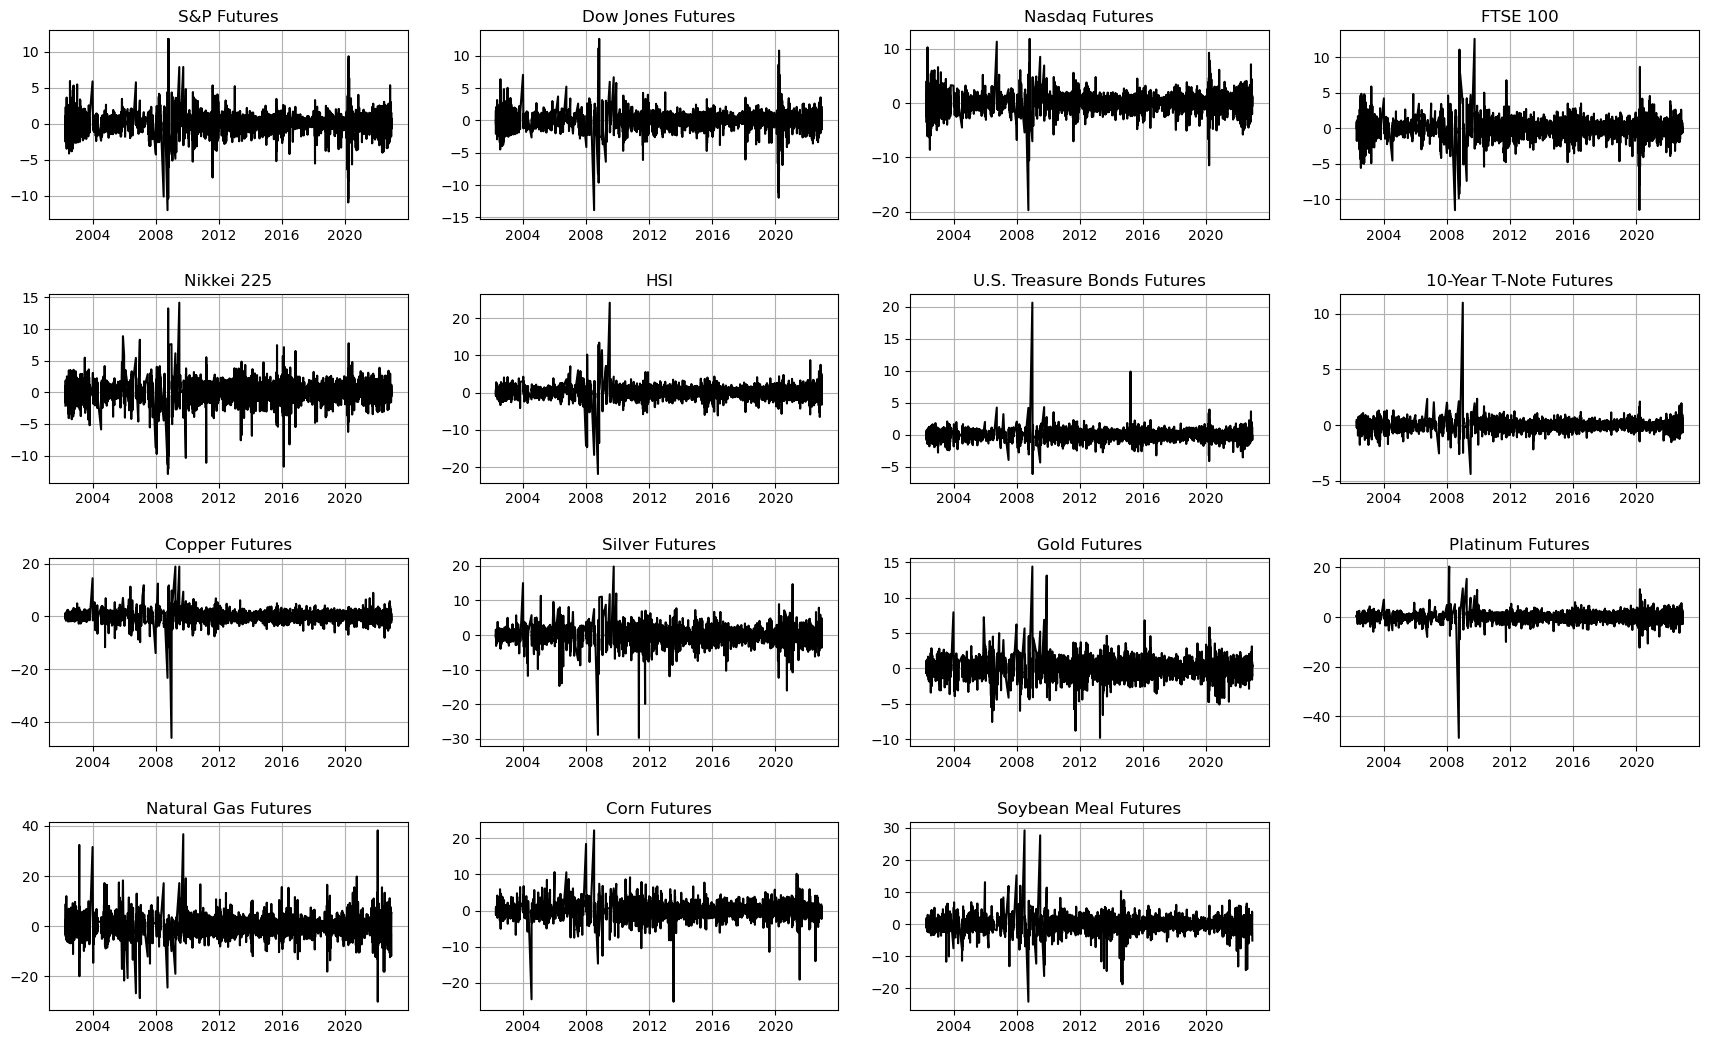

In [8]:
plt.figure(figsize=(30,14))

for i in enumerate(series_name):
    ax = plt.subplot(4, 4, i[0]+1)
    plt.plot(data_r.index, data_r[i[1]], color="black")
    plt.title(i[1])
    plt.grid(True)

plt.subplots_adjust(top=0.8, bottom=0.1, left=0.2, right=0.75, hspace=0.4, wspace=0.2)

plt.savefig("./graphs/retornos.pdf")

Ahora es momento de estimar la volatilidad de cada serie. Para ello se usará un modelo GARCH(1,1) con distribucion t-student para capturar las colas pesadas. La necesidad de estimar con una t-student es evidente al observar las `distribuciones` de las series de los retornos y también sus `curtosis`

In [9]:
mu, sigma = 0, 1
normal_distribution = np.random.normal(mu, sigma, data_r.shape[0])

print(f"La kurtosis de una distribución normal es: {np.round(kurtosis(normal_distribution)+3, 3)}")

La kurtosis de una distribución normal es: 3.01


In [10]:
for i in enumerate(series_name):
    print(
        f"La curtosis de los retornos de {i[1]} es: {np.round(kurtosis(data_r[i[1]])+3, 3)}"
    )

La curtosis de los retornos de S&P Futures es: 16.631
La curtosis de los retornos de Dow Jones Futures es: 20.918
La curtosis de los retornos de Nasdaq Futures es: 15.157
La curtosis de los retornos de FTSE 100 es: 15.855
La curtosis de los retornos de Nikkei 225 es: 13.882
La curtosis de los retornos de HSI es: 36.901
La curtosis de los retornos de U.S. Treasure Bonds Futures es: 119.472
La curtosis de los retornos de 10-Year T-Note Futures es: 102.07
La curtosis de los retornos de Copper Futures es: 81.69
La curtosis de los retornos de Silver Futures es: 24.423
La curtosis de los retornos de Gold Futures es: 16.824
La curtosis de los retornos de Platinum Futures es: 129.291
La curtosis de los retornos de Natural Gas Futures es: 15.451
La curtosis de los retornos de Corn Futures es: 22.896
La curtosis de los retornos de Soybean Meal Futures es: 28.457


Entonces, se demuestra que es necesario modelar los errores como un t-student. Los modelos GARCH(1,1) son estimados a continuacion:

In [11]:
data_v = data_r.copy()

for i in data_r:
    garch = arch_model(data_r[i], p=1, q=1, dist="t")
    garch = garch.fit(disp=0)
    
    data_v[i] = garch.conditional_volatility

    print(f"Se estimo la volatilidad de: {i}")

Se estimo la volatilidad de: S&P Futures
Se estimo la volatilidad de: Dow Jones Futures
Se estimo la volatilidad de: Nasdaq Futures
Se estimo la volatilidad de: FTSE 100
Se estimo la volatilidad de: Nikkei 225
Se estimo la volatilidad de: HSI
Se estimo la volatilidad de: U.S. Treasure Bonds Futures
Se estimo la volatilidad de: 10-Year T-Note Futures
Se estimo la volatilidad de: Copper Futures
Se estimo la volatilidad de: Silver Futures
Se estimo la volatilidad de: Gold Futures
Se estimo la volatilidad de: Platinum Futures
Se estimo la volatilidad de: Natural Gas Futures
Se estimo la volatilidad de: Corn Futures
Se estimo la volatilidad de: Soybean Meal Futures


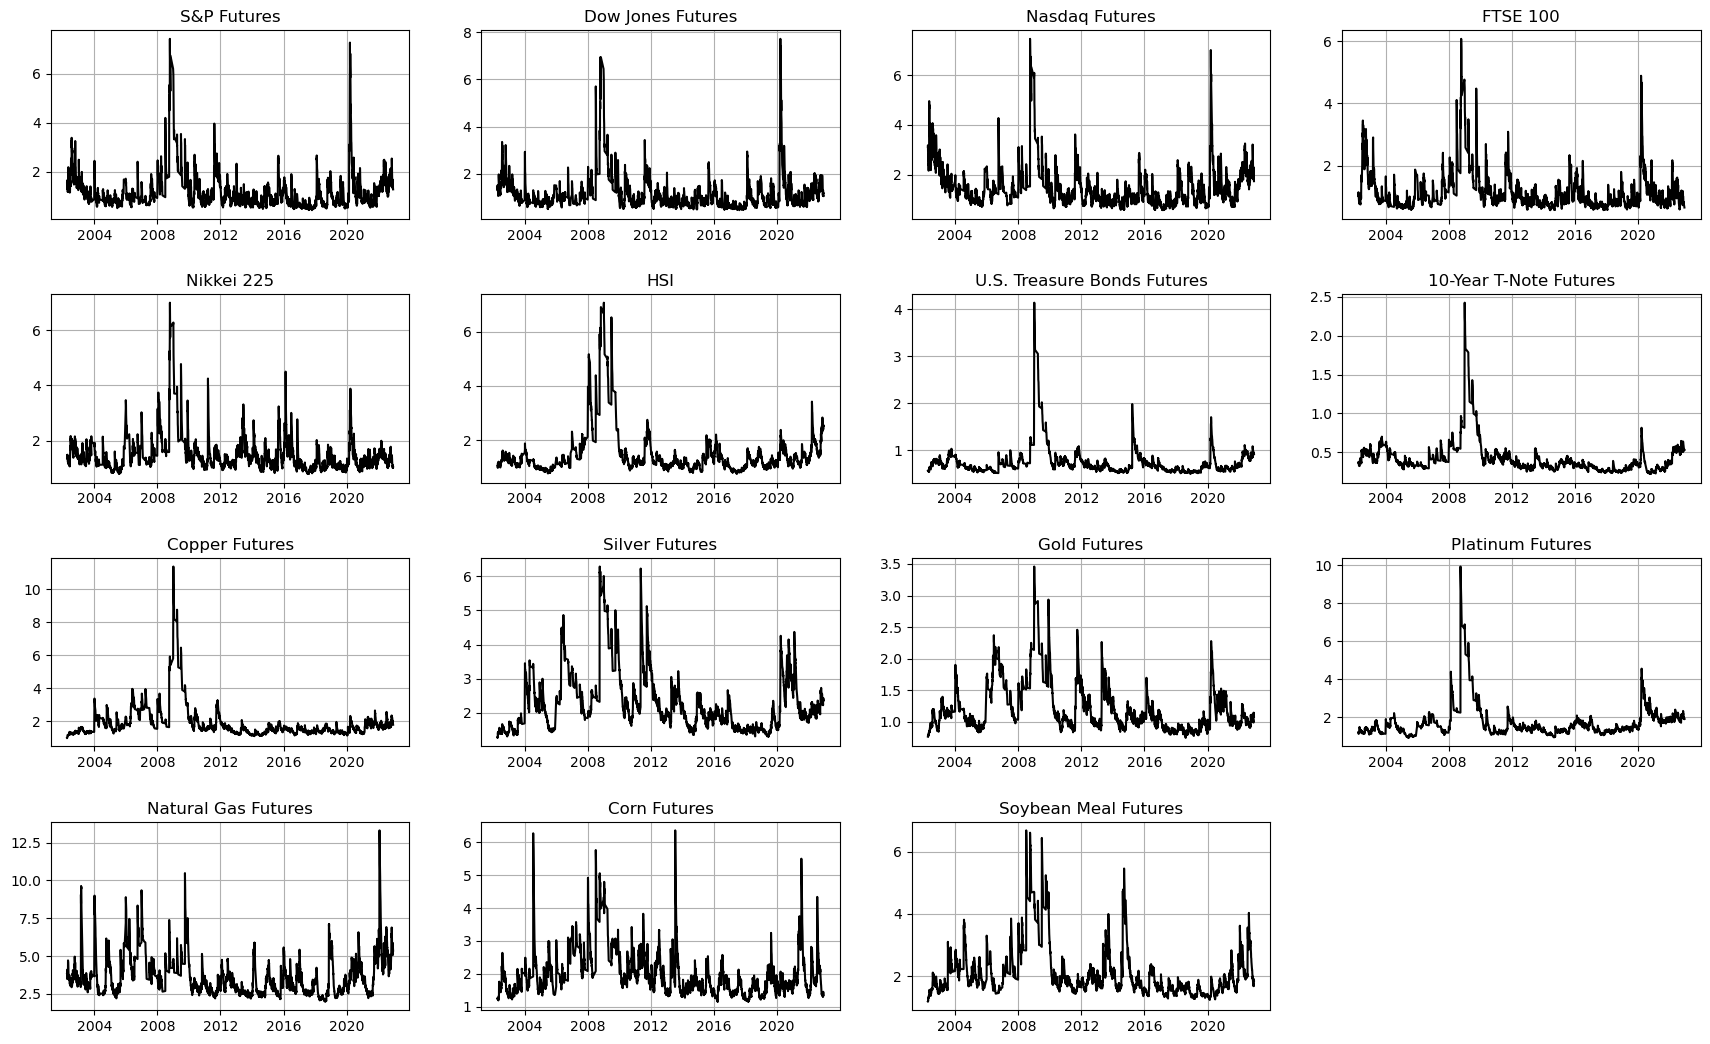

In [12]:
plt.figure(figsize=(30,14))

for i in enumerate(series_name):
    ax = plt.subplot(4, 4, i[0]+1)
    plt.plot(data_v.index, data_v[i[1]], color="black")
    plt.title(i[1])
    plt.grid(True)

plt.subplots_adjust(top=0.8, bottom=0.1, left=0.2, right=0.75, hspace=0.4, wspace=0.2)

plt.savefig("./graphs/volatilidades.pdf")

In [13]:
data_v.to_excel("./Base de datos/volatilidades.xlsx")

Ademas, dada la existencia de un índice de incertidumbre muy usada en la literatura que es el `CBOE Volatility Index` o tambien llamado `VIX`, se importara para luego realizar la comparativa

In [14]:
vix_d = yf.Ticker("^VIX").history(period="max")[["Close"]]
vix_d.rename(columns={"Close": "VIX"}, inplace=True)

vix_d = vix_d[vix_d.index >= "2002-04-09"]

vix_d.tail()

,VIX
Date,
2022-12-06,22.170000
2022-12-07,22.680000
2022-12-08,22.290001
2022-12-09,22.830000
2022-12-12,25.000000


In [15]:
# Transformando a data mensual
vix_m = vix_d.groupby(vix_d.index.strftime('%Y-%m')).VIX.agg(['mean'])
vix_m.index = pd.to_datetime(vix_m.index)
vix_m = vix_m.rename(columns={"mean": "VIX"})

# Transformando a data trimestral
vix_q = vix_m.resample('Q').mean()

In [16]:
with pd.ExcelWriter("./Base de datos/vix.xlsx") as writer:
    vix_d.to_excel(writer, sheet_name="Diario")
    vix_m.to_excel(writer, sheet_name="Mensual")
    vix_q.to_excel(writer, sheet_name="Trimestral")